<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BDL4%5D_Classifica%C3%A7%C3%A3o_de_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 7: Classificação de roupas

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.7.0'

# Etapa 2: Carregamento da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

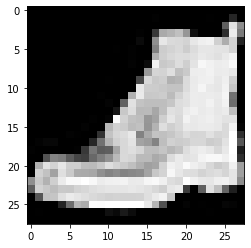

In [ ]:
i = random.randint(1, 60000)
#plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
label = training[i,0]
label

9.0

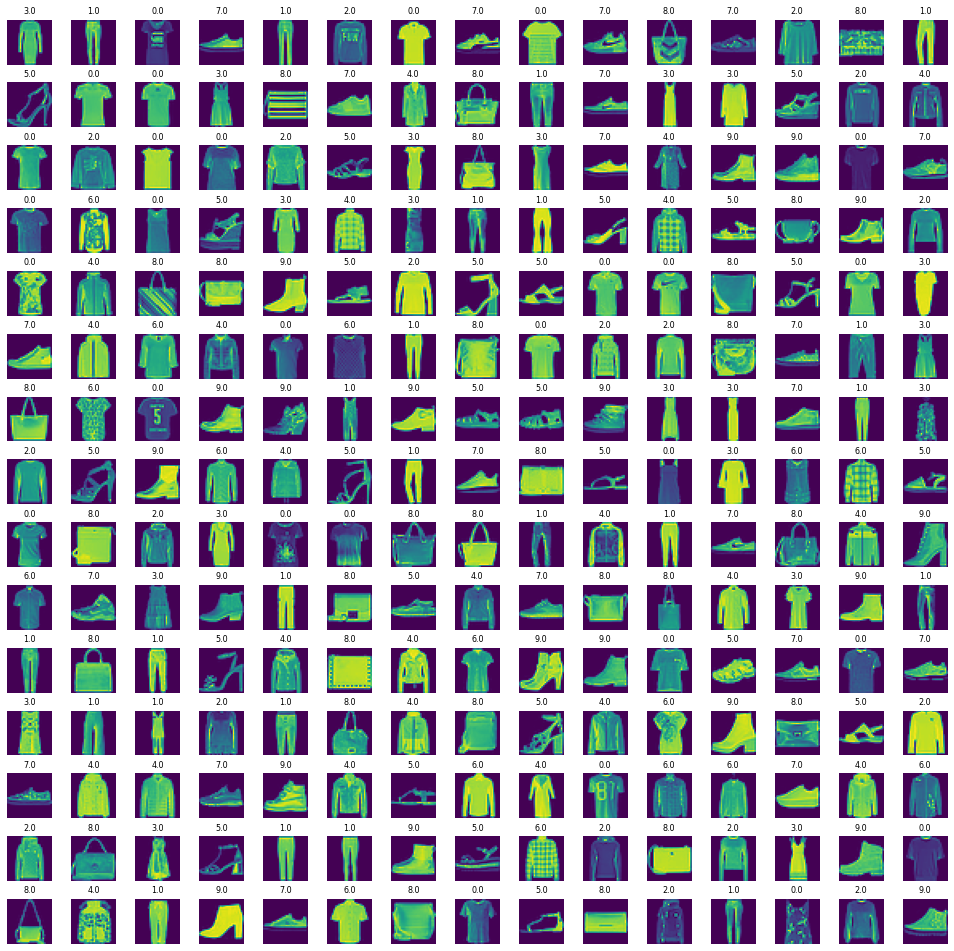

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [ ]:
X_train = training[:,1:] / 255
y_train = training[:,0]

In [ ]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 12s 12ms/step - loss: 0.8790 - accuracy: 0.6910
Epoch 2/150
118/118 [==============================] - 1s 11ms/step - loss: 0.5007 - accuracy: 0.8143
Epoch 3/150
118/118 [==============================] - 1s 11ms/step - loss: 0.4163 - accuracy: 0.8512
Epoch 4/150
118/118 [==============================] - 1s 11ms/step - loss: 0.3698 - accuracy: 0.8684
Epoch 5/150
118/118 [==============================] - 1s 11ms/step - loss: 0.3370 - accuracy: 0.8795
Epoch 6/150
118/118 [==============================] - 1s 11ms/step - loss: 0.3212 - accuracy: 0.8858
Epoch 7/150
118/118 [==============================] - 1s 11ms/step - loss: 0.3014 - accuracy: 0.8918
Epoch 8/150
118/118 [==============================] - 1s 11ms/step - loss: 0.2901 - accuracy: 0.8961
Epoch 9/150
118/118 [==============================] - 1s 11ms/step - loss: 0.2819 - accuracy: 0.8980
Epoch 10/150
118/118 [==============================] - 1s 11ms/step - loss: 0.26

# Etapa 6: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9210 - accuracy: 0.9157


In [ ]:
evaluation

[0.9210088849067688, 0.9157000184059143]

In [ ]:
#predicted_classes = cnn.predict_classes(X_test) -- Atualizado: 17/01/22

In [ ]:
predict_x=cnn.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

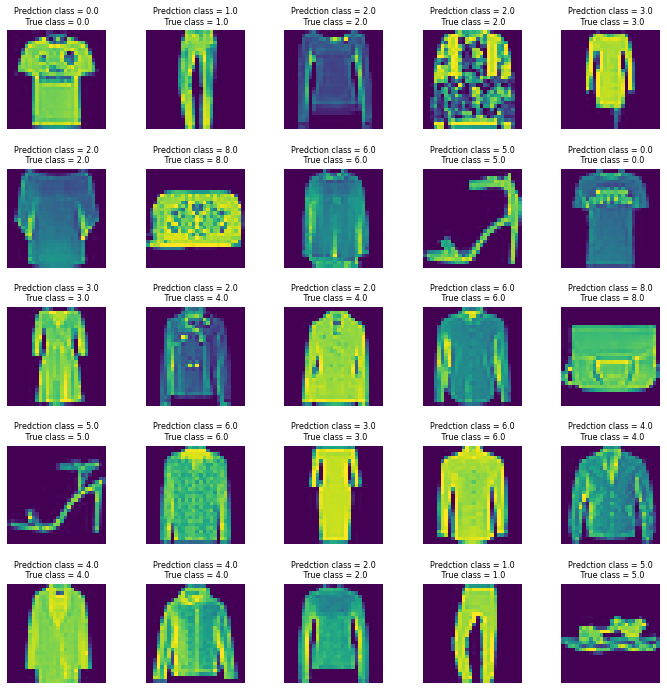

In [ ]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

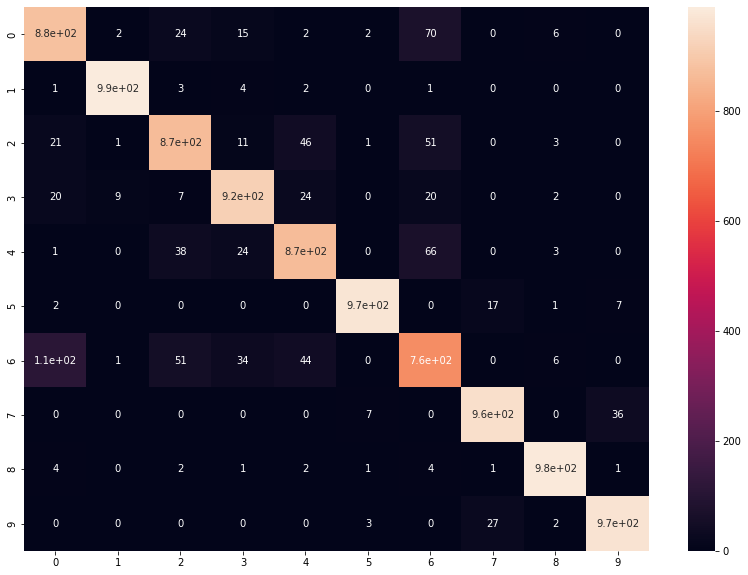

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[879,   2,  24,  15,   2,   2,  70,   0,   6,   0],
       [  1, 989,   3,   4,   2,   0,   1,   0,   0,   0],
       [ 21,   1, 866,  11,  46,   1,  51,   0,   3,   0],
       [ 20,   9,   7, 918,  24,   0,  20,   0,   2,   0],
       [  1,   0,  38,  24, 868,   0,  66,   0,   3,   0],
       [  2,   0,   0,   0,   0, 973,   0,  17,   1,   7],
       [109,   1,  51,  34,  44,   0, 755,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 957,   0,  36],
       [  4,   0,   2,   1,   2,   1,   4,   1, 984,   1],
       [  0,   0,   0,   0,   0,   3,   0,  27,   2, 968]])

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [ ]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.76      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

